In [1]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import os

In [2]:
base_path = "/cluster/projects/vc/courses/TDT17/2022/open/RDD2022/Norway/"
train_path = base_path + "train/annotations/xmls/"


class_count = {
    "D00": 0,
    "D10": 0,
    "D20": 0,
    "D30": 0,
    "D40": 0,
}

dimensions = {
    "h": [],
    "w": []
}

for f in os.listdir(train_path):
    in_file = open(train_path + f)

    tree = ET.parse(in_file)
    root = tree.getroot()
    size = root.find('size')
    w = int(size.find('width').text)
    h = int(size.find('height').text)
    
    dimensions["h"].append(h)
    dimensions["w"].append(w)

    for obj in root.iter('object'):
        #difficult = obj.find('difficult').text
        cls = obj.find('name').text
        
        class_count[cls] += 1
        
        
class_count

{'D00': 8570, 'D10': 1730, 'D20': 468, 'D30': 0, 'D40': 461}

Text(0.5, 1.0, 'Distribution of labeled classes')

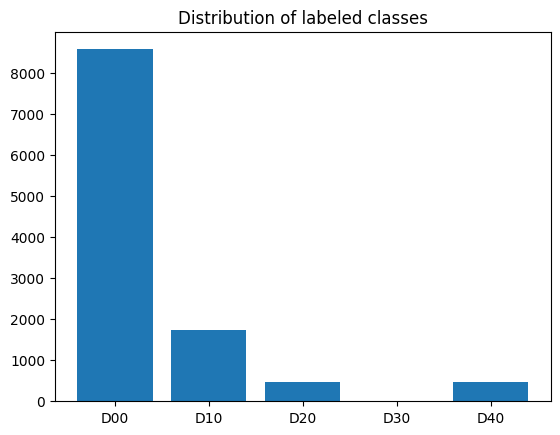

In [3]:
plt.bar(range(len(class_count)), list(class_count.values()), align='center')
plt.xticks(range(len(class_count)), list(class_count.keys()))
plt.title("Distribution of labeled classes")

Text(0.5, 1.0, 'Distribution of image width')

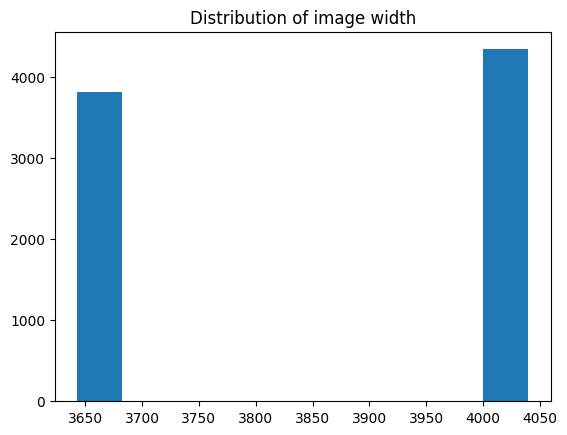

In [4]:
plt.hist(dimensions["w"])
plt.title("Distribution of image width")

Text(0.5, 1.0, 'Distribution of image height')

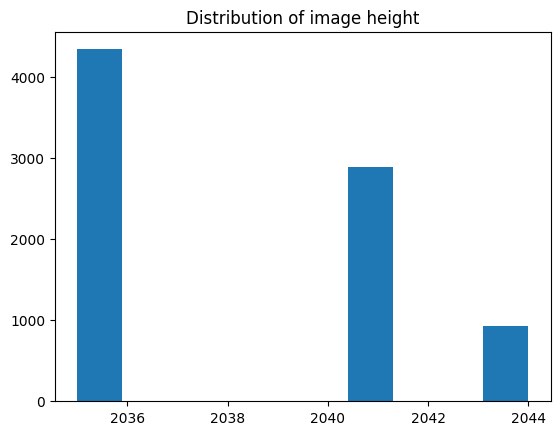

In [5]:
plt.hist(dimensions["h"])
plt.title("Distribution of image height")

In [6]:
train_path = base_path + "train/images/"
test_path = base_path + "test/images/"

train_count = 0
test_count = 0

for f in os.listdir(train_path):
    train_count += 1

for f in os.listdir(test_path):
    test_count += 1
    
print("Num train images:", train_count, "Num test images:", test_count)

Num train images: 8161 Num test images: 2040
